In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [3]:
data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [7]:
data['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [8]:
data['PoolQC'].isna().sum()

1453

In [9]:
data['MiscFeature'].isna().sum()

1406

In [10]:
#So is Month and Year sold a categorical or a numerical feature??
%matplotlib inline

In [11]:
data['MoSold'].astype('category').value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

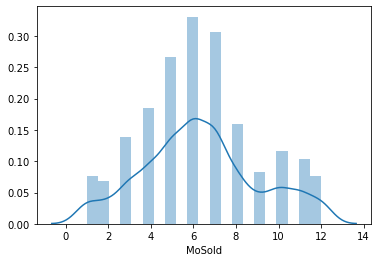

In [12]:
sns.distplot(data['MoSold'])
plt.show()

In [13]:
data['YrSold'].astype('category').value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

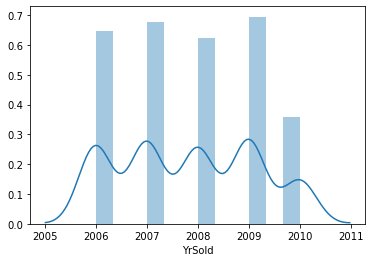

In [14]:
sns.distplot(data['YrSold'])
plt.show()

In [15]:
#So the inference is that most of the houses were sold in middle of the year. But there is no such pattern for the years

In [16]:
data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

1.8828757597682129

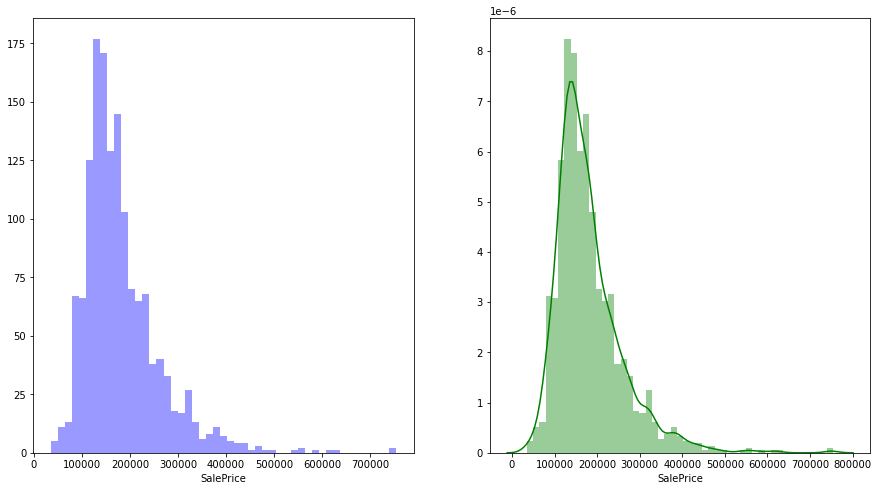

In [17]:
fig, ax = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(data['SalePrice'],norm_hist=False,kde=False, ax=ax[0], color='blue')
sns.distplot(data['SalePrice'], kde=True,ax=ax[1], color='green')
data['SalePrice'].skew()

In [18]:
#So the sale price is right skewed i.e a positive skew exists(mean>median) i.e a tailing end on the right side.
#Positive skew=1.88

0.12133506220520406

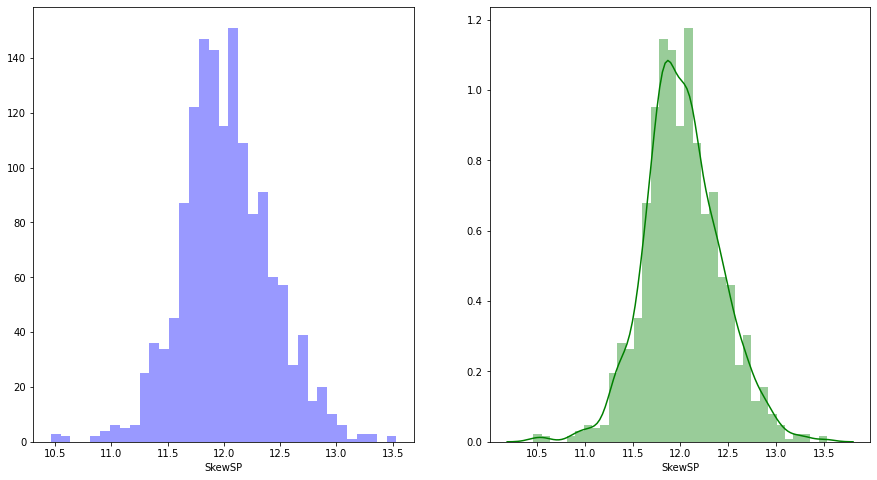

In [19]:
#So lets perform log transformation in order to remove the skewness and check skew after log transform
data['SkewSP']=np.log(data['SalePrice'])
fig, ax = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(data['SkewSP'],norm_hist=False,kde=False, ax=ax[0], color='blue')
sns.distplot(data['SkewSP'], kde=True,ax=ax[1], color='green')
data['SkewSP'].skew()

In [20]:
#There..thatsss waaaay better!!

In [21]:
# So PoolQC,Fence,MiscFeature etc has high% of missing vals considering the fact that we've 1460 examples
#Buttt..
#Also note that BsmtQual BsmtCond BsmtExposure BsmtFinType1 i.e Basement related features.It doesnt have missing values. 
#Missing vals just means that there is no basement.
#The same is the case for fireplace related feature FireplaceQu. Missing vals just means that there is no fireplace.
#Also for Garage related features and also for Fence and PoolQC.Missing vals just means that there is no pool/fence/garage.
#The same is the case for the MiscFeature.
#So we wont be dropping any features that contains missing values.

In [22]:
#Creating a data frame for num values for feature analysis
data_num=data.select_dtypes(include=['float64','int64'])
data_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SkewSP
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,12.429216


In [23]:
#Month sold and Year sold is more of a categorical feature. So we drop that along with the Id.

In [24]:
data_num=data_num.drop(['MoSold','YrSold','Id'],axis=1)

In [25]:
# So let us create a pairwise scatter plot,to understand the correclations between the dependant and independant features

In [26]:
corr=data_num.corr()[['SalePrice']]
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
SkewSP           0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [27]:
# OverallQual and GarageCars and GarageArea and GrLivArea and TotalBsmtSF seem to have a high positive correlation with SalePrice.
#Let us see if SalePrice is linearly dependant with all the independant vars. 

In [28]:
#OverallQual::
pivot_table=pd.pivot_table(data_num,index='OverallQual',values='SalePrice',aggfunc='median')
pivot_table

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


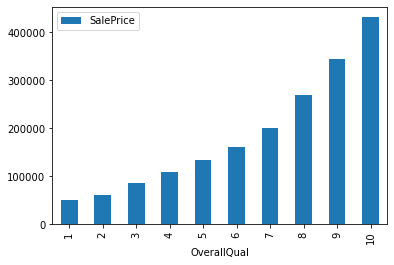

In [29]:
pivot_table.plot(kind='bar')

In [30]:
#A linear relation is clearly visible 

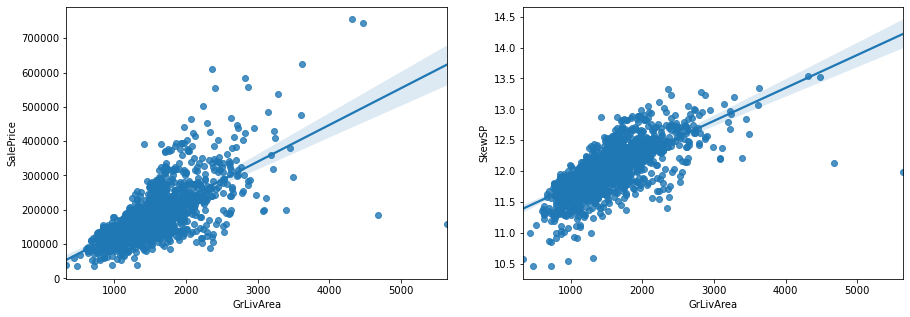

In [31]:
# GrLivArea::
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='GrLivArea',y='SalePrice',data=data_num,ax=ax[0])
sns.regplot(x='GrLivArea',y='SkewSP',data=data_num,ax=ax[1])

In [32]:
# GarageCars ::
pivot_table=pd.pivot_table(data_num,index='GarageCars',values='SalePrice',aggfunc='median')
pivot_table

,SalePrice
GarageCars,
0,100000
1,128000
2,177750
3,295000
4,200000


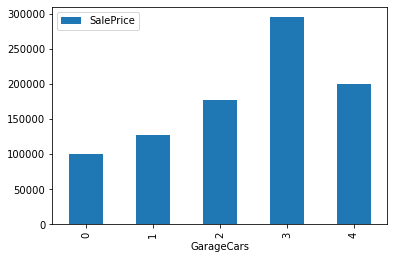

In [33]:
pivot_table.plot(kind='bar')

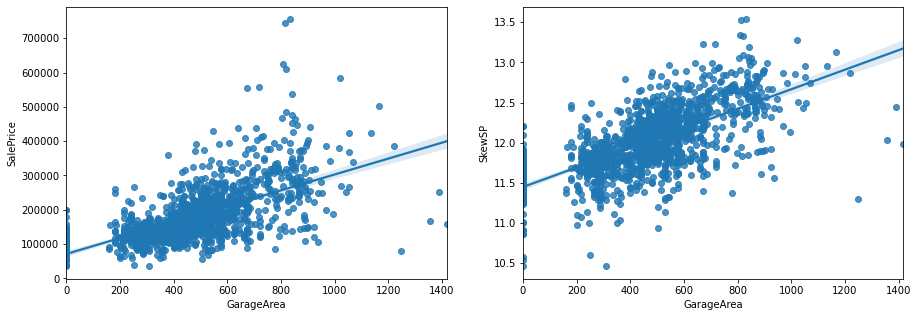

In [34]:
# GarageArea::
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.regplot(x='GarageArea',y='SalePrice',data=data_num,ax=ax[0])
sns.regplot(x='GarageArea',y='SkewSP',data=data_num,ax=ax[1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


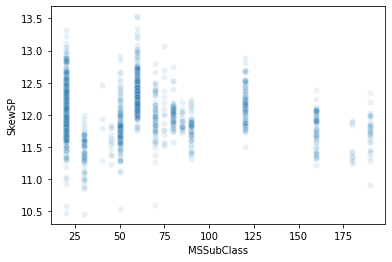

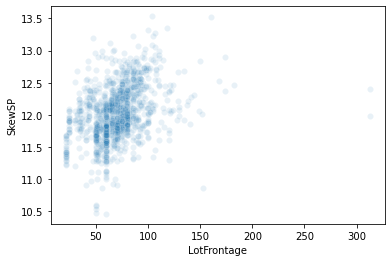

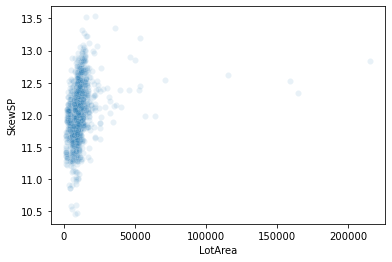

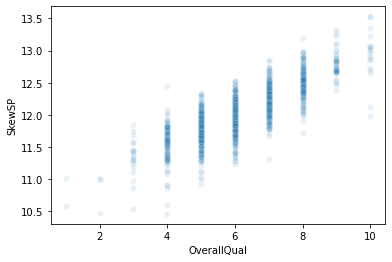

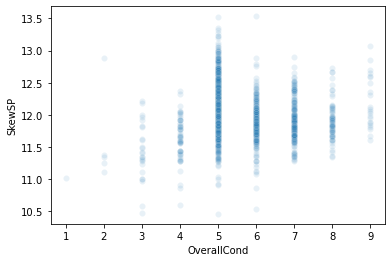

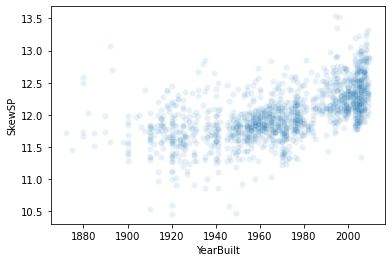

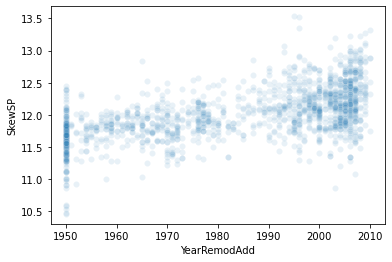

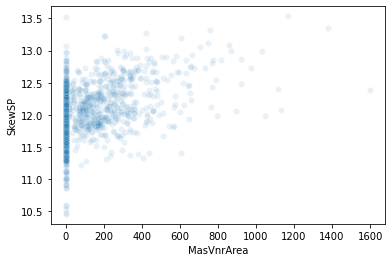

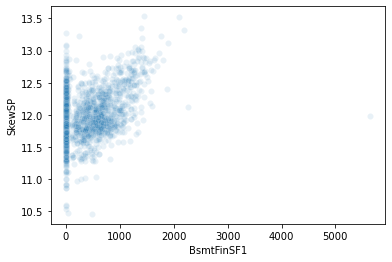

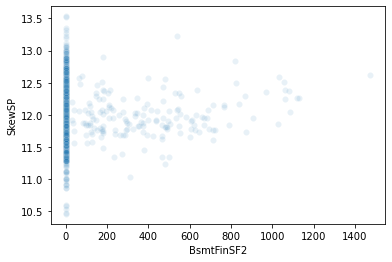

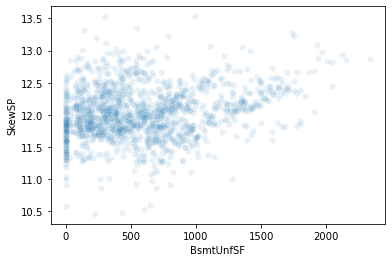

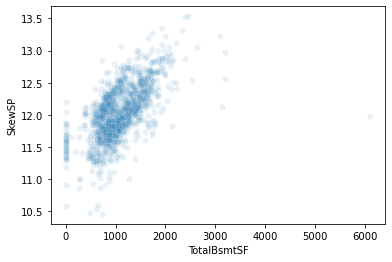

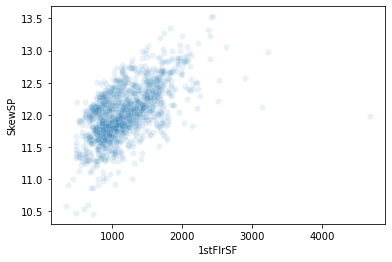

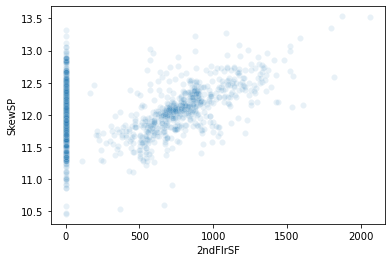

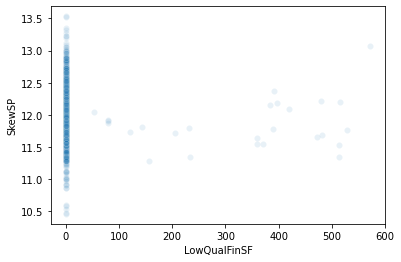

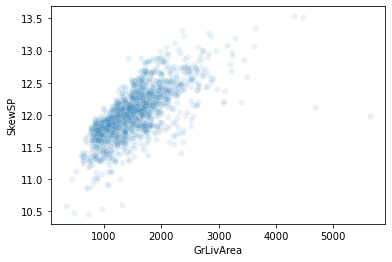

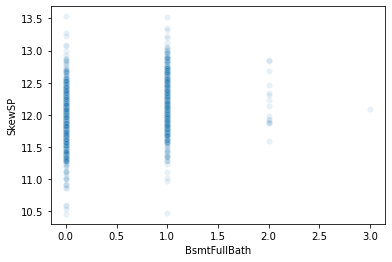

Error in callback <function flush_figures at 0x7f6405ebc3b0> (for post_execute):



KeyboardInterrupt



In [35]:
for i,col in enumerate(data_num.columns):
    plt.figure(i)
    sns.scatterplot(x=data_num[col],y=data_num['SkewSP'],alpha=0.1)

In [36]:
#There are manyyyyy fatures with a linear correlation but also has a straight vertical line at the left part of the plot. 
#These straight lines have to be removed. Cuz its not a good representation of the data.Eg: WoodDeckSF,OpennPorchSF,2ndFlrSf, MasVnrArea etc
#But looking at the scatterplts,features that seem to have no correlation at all are:
#MSSubClass, BsmtFinSF2 , LowQualFinSF ,BsmtHalfBath

In [37]:
#Let us visualize the correlation matrix using a heat map

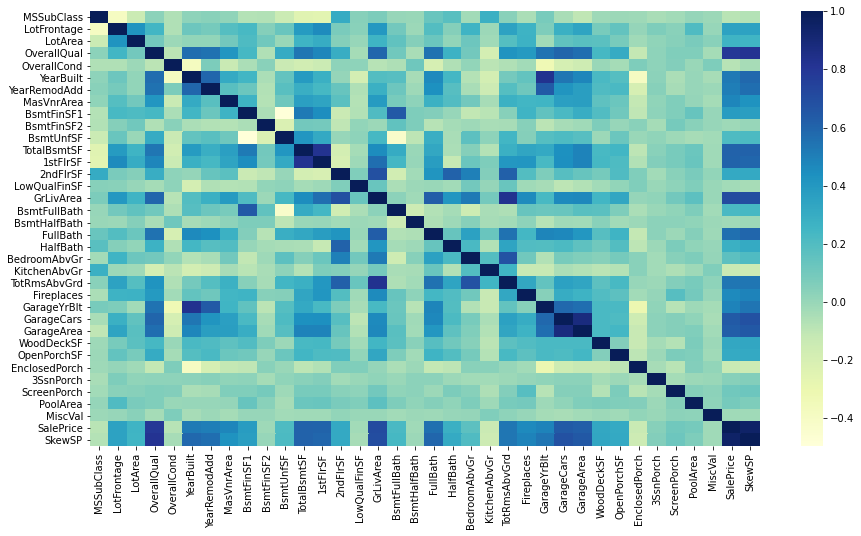

In [38]:
corr=data_num.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=False,cmap="YlGnBu")

In [39]:
#GarageCars and GarageArea have high positive ccorrelation and among them,GarageCars has higher correlation with SalePrice so we'll keep that
data_f=data.drop(['Id','BsmtFinSF2' , 'LowQualFinSF' ,'BsmtHalfBath','GarageArea'],axis=1)

In [40]:
data_f.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SkewSP
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


In [41]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [42]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [43]:
X=data_f.drop(['SalePrice','SkewSP'],axis=1)
y=data_f['SkewSP']

In [44]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
X_train.shape

(1022, 75)

In [46]:
X_cv.shape

(438, 75)

In [47]:
cat_feats=data_f.select_dtypes(include=['object'])
cat_features=list(cat_feats.columns)
num_feats=data_f.select_dtypes(include=['int64','float64'])
num_feats=num_feats.drop(['SalePrice','SkewSP'],axis=1)
num_features=list(num_feats.columns)

In [48]:
num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',StandardScaler())
])
cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='Doesnt exist')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])


In [49]:
preprocess=ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('cat',cat_pipeline,cat_features)
])

In [50]:
#In the column transformer, the steps in the pipeline is performed on each feature
#Finally we create another pipeline to chain preprocessing step and model training step


In [51]:
from sklearn.linear_model import Ridge,LinearRegression

In [ ]:
############################################ LINEAR REGRESSION ####################################################


In [52]:
###### Pipeline fro Linear regression
pipe_linear_reg=Pipeline(steps=[
    ('preprocess',preprocess),
    ('lin reg', LinearRegression())
])

In [53]:
pipe_linear_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF

In [54]:
y_pred_train=pipe_linear_reg.predict(X_train)
y_pred_cv=pipe_linear_reg.predict(X_cv)

In [55]:
# r2 score and RMSE on the train set and cv set::::
print('r2_score on train set=\n {0}'.format(r2_score(y_train,y_pred_train)))
print('RMSE on train set=\n {0}'.format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train)))))
print('r2_score on CV set=\n {0}'.format(r2_score(y_cv,y_pred_cv)))
print('RMSE on CV set=\n {0}'.format(np.sqrt(mean_squared_error(np.exp(y_cv),np.exp(y_pred_cv)))))

r2_score on train set=
 0.9469273374673713
RMSE on train set=
 17811.367776451425
r2_score on CV set=
 0.8889196645127587
RMSE on CV set=
 24334.674236876333


Text(0.5, 1.0, 'Linear Regression Model')

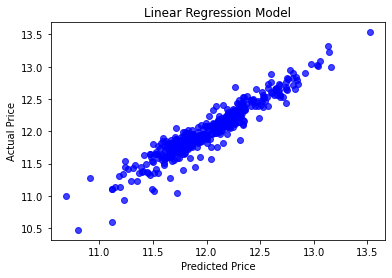

In [72]:
actual_values = y_cv
plt.scatter(y_pred_cv, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [58]:
###Outlier problem has not been addressed yet>>>

In [ ]:
################################################ Ridge Regression #############################################################


In [59]:
###### Pipeline fro Ridge regression


In [60]:
TRAIN_ERROR=[]
CV_ERROR=[]
TRAIN_R2=[]
CV_R2=[]
Alpha=[]
for i in range(-5,3):
    a=10**i 
    # r2 score and RMSE on the train set and cv set::::
    pipe_ridge_reg=Pipeline(steps=[
    ('preprocess',preprocess),
    ('ridge reg', Ridge(alpha=a))])
    pipe_ridge_reg.fit(X_train,y_train)
    y_pred_train=pipe_ridge_reg.predict(X_train)
    y_pred_cv=pipe_ridge_reg.predict(X_cv)   
    TRAIN_ERROR.append(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))))
    CV_ERROR.append(np.sqrt(mean_squared_error(np.exp(y_cv),np.exp(y_pred_cv))))
    TRAIN_R2.append(r2_score(y_train,y_pred_train))
    CV_R2.append(r2_score(y_cv,y_pred_cv))
    Alpha.append(a)

    
    

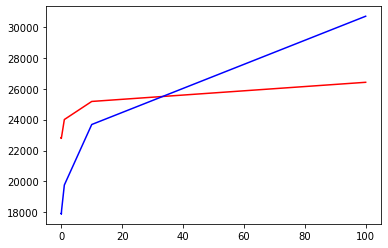

In [61]:
plt.plot(Alpha,CV_ERROR,'r-')
plt.plot(Alpha,TRAIN_ERROR,'b-')
plt.show()

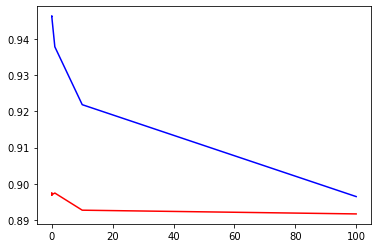

In [62]:
plt.plot(Alpha,CV_R2,'r-')
plt.plot(Alpha,TRAIN_R2,'b-')
plt.show()

In [63]:
######################## Best value of alpha=0.01. At this value of alpha errors are:::::::::

In [64]:
    pipe_ridge_reg=Pipeline(steps=[
    ('preprocess',preprocess),
    ('ridge reg', Ridge(alpha=0.01))])
    pipe_ridge_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF

In [65]:
y_pred_train=pipe_ridge_reg.predict(X_train)
y_pred_cv=pipe_ridge_reg.predict(X_cv)
print('r2_score on train set=\n {0}'.format(r2_score(y_train,y_pred_train)))
print('RMSE on train set=\n {0}'.format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train)))))
print('r2_score on CV set=\n {0}'.format(r2_score(y_cv,y_pred_cv)))
print('RMSE on CV set=\n {0}'.format(np.sqrt(mean_squared_error(np.exp(y_cv),np.exp(y_pred_cv)))))

r2_score on train set=
 0.9462640926918279
RMSE on train set=
 17898.67235588703
r2_score on CV set=
 0.8971044012286884
RMSE on CV set=
 22826.768795422606


In [ ]:
################################################## Random Forest Regressor #####################################################

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
###### Pipeline fro Random Forest Regression
pipe_rf_reg=Pipeline(steps=[
('preprocess',preprocess),
('rf reg', RandomForestRegressor())])

In [117]:
pipe_rf_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF

In [115]:
y_pred_train=pipe_rf_reg.predict(X_train)
y_pred_cv=pipe_rf_reg.predict(X_cv)
print('r2_score on train set=\n {0}'.format(r2_score(y_train,y_pred_train)))
print('RMSE on train set=\n {0}'.format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train)))))
print('r2_score on CV set=\n {0}'.format(r2_score(y_cv,y_pred_cv)))
print('RMSE on CV set=\n {0}'.format(np.sqrt(mean_squared_error(np.exp(y_cv),np.exp(y_pred_cv)))))

r2_score on train set=
 0.9789425834063032
RMSE on train set=
 12712.162529558485
r2_score on CV set=
 0.8869033412262795
RMSE on CV set=
 27724.048805573126


In [ ]:
# Lets apply GridSearchCv to find best params

In [119]:
from sklearn.model_selection import GridSearchCV

In [143]:
gridsearch=GridSearchCV(pipe_rf_reg,{'rf reg__n_estimators':[50,100,150],'rf reg__max_features':[40,60,80]},scoring='neg_root_mean_squared_error')
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                               

In [144]:

gridsearch.cv_results_

{'mean_fit_time': array([0.84902802, 1.61924009, 2.40924783, 1.07256818, 2.09999399,
        3.19917741, 1.30347719, 2.52408328, 3.77211213]),
 'std_fit_time': array([0.01564911, 0.00856608, 0.01498661, 0.01102809, 0.01677386,
        0.09544117, 0.00804989, 0.01424946, 0.02053283]),
 'mean_score_time': array([0.03095374, 0.03857427, 0.04778423, 0.02957582, 0.03808198,
        0.04792199, 0.03094459, 0.0388762 , 0.0477951 ]),
 'std_score_time': array([0.00169758, 0.00112216, 0.00105572, 0.00027799, 0.00113614,
        0.00108217, 0.00200089, 0.00048227, 0.00048761]),
 'param_rf reg__max_features': masked_array(data=[40, 40, 40, 60, 60, 60, 80, 80, 80],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_rf reg__n_estimators': masked_array(data=[50, 100, 150, 50, 100, 150, 50, 100, 150],
              mask=[False, False, False, False, False, False, False, False,
              

In [145]:
gridsearch.best_score_

-0.14361005126415216

In [146]:
gridsearch.best_params_

{'rf reg__max_features': 80, 'rf reg__n_estimators': 100}

In [147]:
pipe_rf_reg=Pipeline(steps=[
('preprocess',preprocess),
('rf reg', RandomForestRegressor(n_estimators=100,max_features=80))])

In [148]:
pipe_rf_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF

In [149]:
y_pred_train=pipe_rf_reg.predict(X_train)
y_pred_cv=pipe_rf_reg.predict(X_cv)
print('r2_score on train set=\n {0}'.format(r2_score(y_train,y_pred_train)))
print('RMSE on train set=\n {0}'.format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train)))))
print('r2_score on CV set=\n {0}'.format(r2_score(y_cv,y_pred_cv)))
print('RMSE on CV set=\n {0}'.format(np.sqrt(mean_squared_error(np.exp(y_cv),np.exp(y_pred_cv)))))

r2_score on train set=
 0.9797031966640319
RMSE on train set=
 12586.179723366358
r2_score on CV set=
 0.8898225246614339
RMSE on CV set=
 28214.221859580855


In [ ]:
########################################### 

In [66]:
data_testf=data_test.drop(['Id','BsmtFinSF2' , 'LowQualFinSF' ,'BsmtHalfBath','GarageArea'],axis=1)

In [67]:
predfinal=pipe_ridge_reg.predict(data_testf)
predfinal[:10]

array([11.66248749, 11.98926329, 12.09490081, 12.18599907, 12.19875405,
       12.06899097, 12.08124252, 11.99501501, 12.22277227, 11.69386723])

In [68]:
predfinal=np.exp(predfinal)
predfinal[:10]

array([116132.54949039, 161016.68853856, 178956.99606335, 196025.31179729,
       198541.62480972, 174379.80210318, 176529.36599812, 161945.47864003,
       203367.96806749, 119834.53911603])

In [69]:
final=pd.DataFrame()
final['Id']=data_test['Id']
final['SalePrice']=predfinal
final.head()

,Id,SalePrice
0,1461,116132.549490
1,1462,161016.688539
2,1463,178956.996063
3,1464,196025.311797
4,1465,198541.624810


In [70]:
final.to_csv('submission1.csv', index=False)